# Convirtiendo precios a retornos

Existen dos tipos de retornos:

* **Retornos simples:** $$r_t = \frac{(P_t - P_{t-1})}{P_{t-1}} = \frac{P_t}{P_{t-1}}-1$$ En Pandas, se puede calcular usando el método `pct_change()`. Ejemplo:


In [3]:
#%pip install yfinance

import pandas as pd
import yfinance as yf

In [4]:
df = yf.download("NVDA", start = "2022-01-01", end = "2024-10-31", auto_adjust=True, multi_level_index=False)
df = df.loc[:, ["Close"]]
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-01-03,30.064436
2022-01-04,29.234999
2022-01-05,27.552170
2022-01-06,28.125084
2022-01-07,27.195833


In [5]:
df["simple_rtn"] = df["Close"].pct_change()
df.head()

,Close,simple_rtn
Date,,
2022-01-03,30.064436,NaN
2022-01-04,29.234999,-0.027589
2022-01-05,27.552170,-0.057562
2022-01-06,28.125084,0.020794
2022-01-07,27.195833,-0.033040


* **Retornos en logaritmos:** $$r_i = \ln \left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})$$ Para calcular estos retornos deberemos usar Numpy

In [6]:
import numpy as np

df["log_rtn"] = np.log(df["Close"] / df["Close"].shift(1))
df.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-03,30.064436,NaN,NaN
2022-01-04,29.234999,-0.027589,-0.027976
2022-01-05,27.552170,-0.057562,-0.059285
2022-01-06,28.125084,0.020794,0.020581
2022-01-07,27.195833,-0.033040,-0.033598


# Ajustar frecuencia de la serie de tiempo

A través de Pandas, se puede cambiar la frecuencia de los datos. Para ello se usa el método `resample()`. Importante: Se puede usar este método solo si el *index* está en formato fecha. El parámetro a pasar en `resample()` puede ser:
* D: calendar day frequency
* W: weekly frequency
* ME: month end frequency
* SME: semi-month end frequency (15th and end of month)
* MS: month start frequency
* SMS: semi-month start frequency (1st and 15th)
* QE: quarter end frequency
* QS: quarter start frequency
* YE: year end frequency
* YS: year start frequency
* h: hourly frequency
* min: minutely frequency
* s: secondly frequency
* ms: milliseconds

**Datos diarios a mensuales:**

In [9]:
df_monthly = df.resample("ME").last()
df_monthly.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-31,24.440025,0.072067,0.069588
2022-02-28,24.339209,0.009438,0.009394
2022-03-31,27.239403,-0.014590,-0.014698
2022-04-30,18.515329,-0.062430,-0.064464
2022-05-31,18.640120,-0.007389,-0.007416


**Datos diarios a semanales:**

Se puede especificar el día de la semana:
* W-SUN: weekly frequency (Sundays). Same as ‘W’
* W-MON: weekly frequency (Mondays)
* W-TUE: weekly frequency (Tuesdays)
* W-WED: weekly frequency (Wednesdays)
* W-THU: weekly frequency (Thursdays)
* W-FRI: weekly frequency (Fridays)
* W-SAT: weekly frequency (Saturdays)

In [11]:
df_weekly = df.resample("W-WED").last()
df_weekly.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-05,27.552170,-0.057562,-0.059285
2022-01-12,27.946424,0.006543,0.006522
2022-01-19,25.019930,-0.032274,-0.032806
2022-01-26,22.729235,0.020068,0.019869
2022-02-02,25.194603,0.024515,0.024219


# Visualización de datos

Para efectos de este ejercicio, usaremos el precio de Tesla.

In [12]:
df = yf.download("TSLA", period = "3mo", auto_adjust = True, multi_level_index = False)
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2025-07-07,293.940002,296.149994,288.769989,291.369995,131177900
2025-07-08,297.809998,304.049988,294.350006,297.000000,103246700
2025-07-09,295.880005,300.149994,293.549988,297.549988,75586800
2025-07-10,309.869995,310.480011,300.000000,300.049988,104365300
2025-07-11,313.510010,314.089996,305.649994,307.890015,79236400
...,...,...,...,...,...
2025-09-30,444.720001,445.000000,433.119995,441.519989,74358000
2025-10-01,459.459991,462.290009,440.750000,443.799988,98122300
2025-10-02,436.000000,470.750000,435.570007,470.540009,137009000


## Visualizando con Pandas

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 15.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 43.6 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 77.0 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------

<Axes: title={'center': 'Precio de Tesla'}, xlabel='Date'>

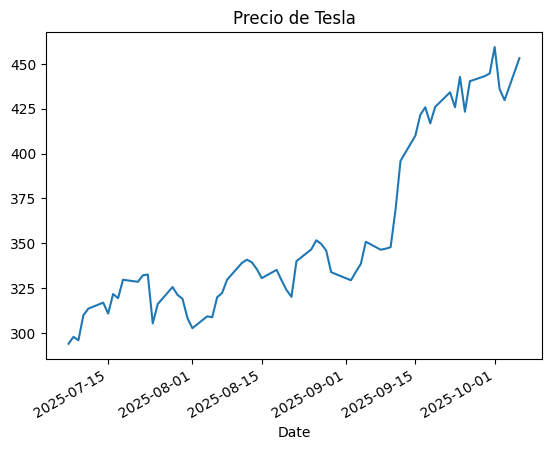

In [16]:
%pip install -U matplotlib

df["Close"].plot(title = "Precio de Tesla")

### Subplots

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

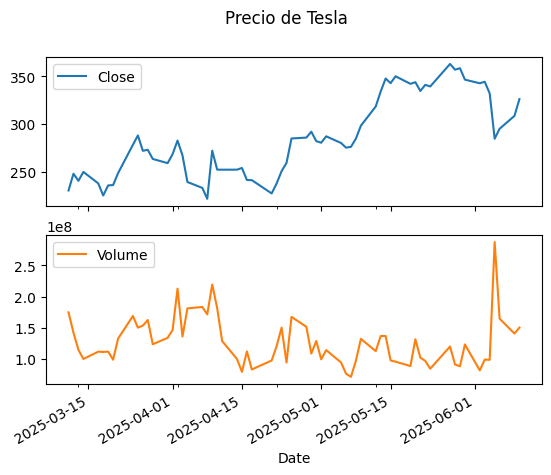

In [35]:
(df[["Close", "Volume"]].plot(subplots = True, sharex = True, title = "Precio de Tesla") )

## Visualización con matplotlib

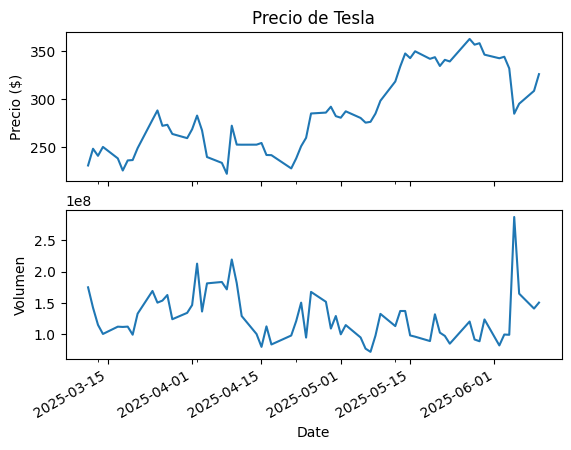

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex = True)

df["Close"].plot(ax = ax[0])
ax[0].set(title = "Precio de Tesla", ylabel = "Precio ($)")

df["Volume"].plot(ax = ax[1])
ax[1].set(ylabel = "Volumen")
# plt.savefig("grafico.png") # Para guardar imagen
plt.show()

Graficaremos high, low y close en un mismo gráfico:

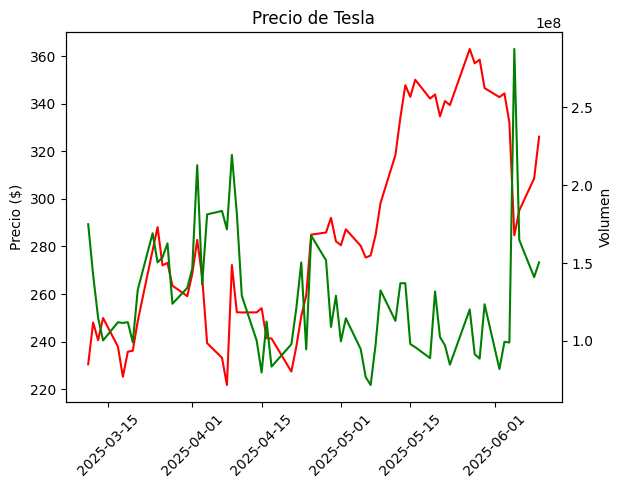

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #inicializa 2 series en el mismo gráfico

ax1.set(title = "Precio de Tesla", ylabel = "Precio ($)")
ax2.set(ylabel = "Volumen")
ax1.plot(df["Close"], color = "red")
ax2.plot(df["Volume"], color = "green")
ax1.xaxis.set_tick_params(rotation=45)
plt.show()


## Visualización con Seaborn

In [38]:
df2 = df.copy()

In [39]:
df2.reset_index(inplace = True) # Extrae fechas desde index hacia columna
df2

,Date,Close,High,Low,Open,Volume
0,2025-03-11,230.580002,237.059998,217.020004,225.309998,174896400
1,2025-03-12,248.089996,251.839996,241.100006,247.220001,142215700
2,2025-03-13,240.679993,248.289993,232.600006,248.130005,114813500
3,2025-03-14,249.979996,251.580002,240.729996,247.309998,100242300
4,2025-03-17,238.009995,245.399994,232.800003,245.059998,111900600
...,...,...,...,...,...,...
59,2025-06-04,332.049988,345.600006,327.329987,345.100006,98912100
60,2025-06-05,284.700012,324.549988,273.209991,322.489990,287499800
61,2025-06-06,295.140015,305.500000,291.140015,298.829987,164747700
62,2025-06-09,308.579987,309.829987,281.850006,285.959991,140908900


(array([20162., 20179., 20193., 20209., 20223., 20240.]),
 [Text(20162.0, 0, '2025-03-15'),
  Text(20179.0, 0, '2025-04-01'),
  Text(20193.0, 0, '2025-04-15'),
  Text(20209.0, 0, '2025-05-01'),
  Text(20223.0, 0, '2025-05-15'),
  Text(20240.0, 0, '2025-06-01')])

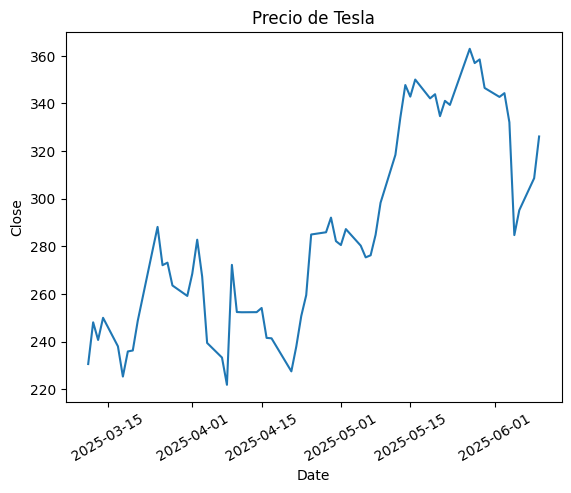

In [40]:
import seaborn as sns

sns.lineplot(x = "Date", y = "Close", data = df2).set(title='Precio de Tesla')
plt.xticks(rotation=30)

## Visualización con Plotly

In [41]:
from plotly.offline import plot
import plotly.express as px

fig = px.line(data_frame = df, y = "Close", title = "Precio TSLA")
fig.show()

In [42]:
# Velas
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

In [43]:
# OHLC
import plotly.graph_objects as go

fig = go.Figure(data=[go.Ohlc(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

## Visualización con mplfinance

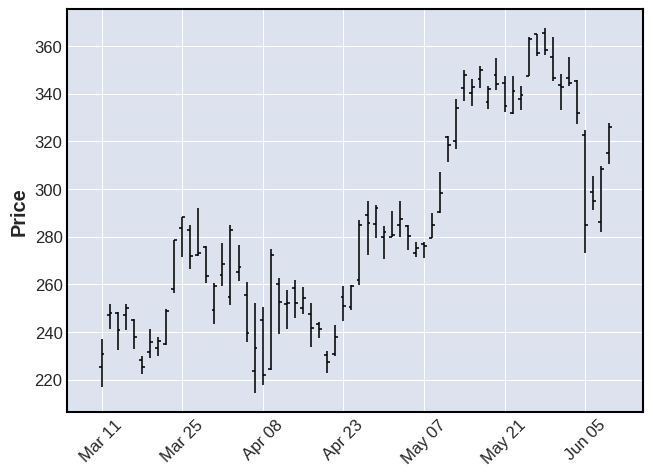

In [46]:
%pip install mplfinance --quiet
import mplfinance as mpf

mpf.plot(df)

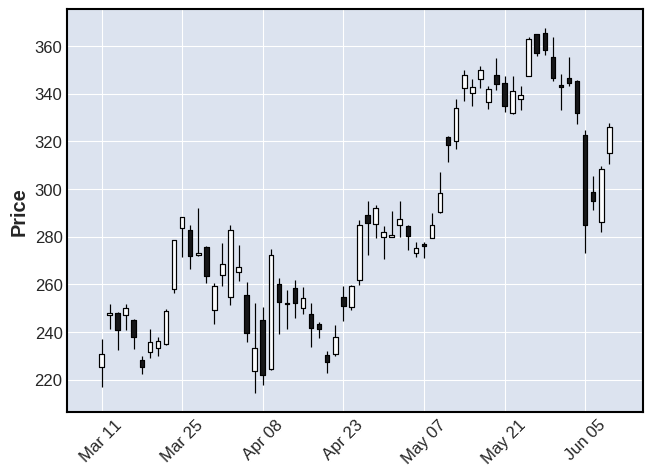

In [47]:
mpf.plot(df,type='candle')

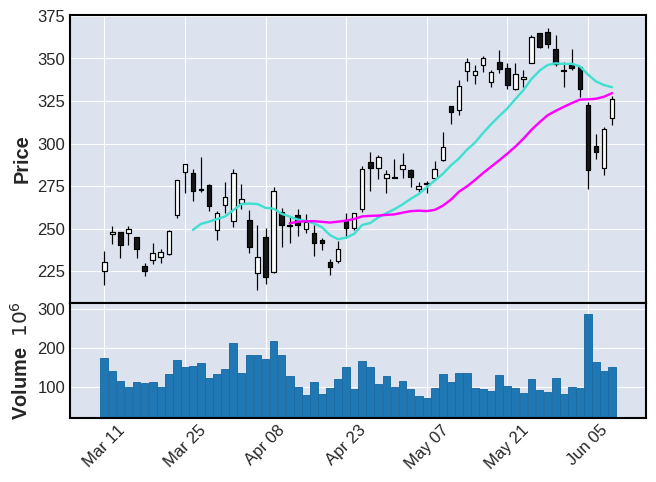

In [48]:
mpf.plot(df,type='candle',mav=(12,24),volume=True)

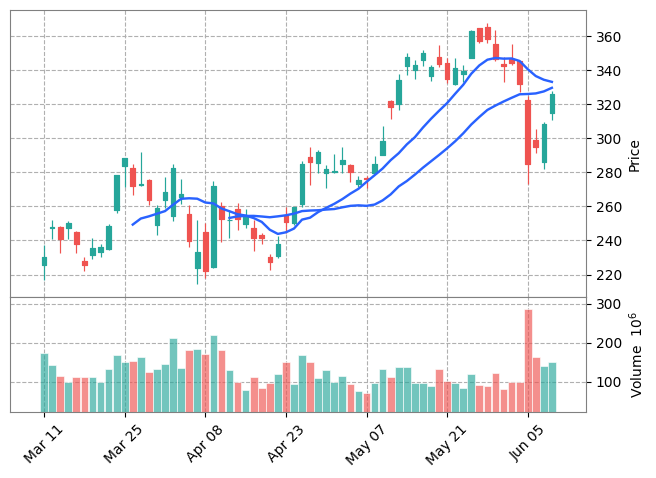

In [49]:
mpf.plot(df,type='candle',mav=(12,24),volume=True, style = "tradingview")

In [50]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

/usr/local/lib/python3.11/dist-packages/mplfinance/_utils.py:129: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.11/dist-packages/mplfinance/_utils.py:130: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.11/dist-packages/mplfinance/_utils.py:131: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



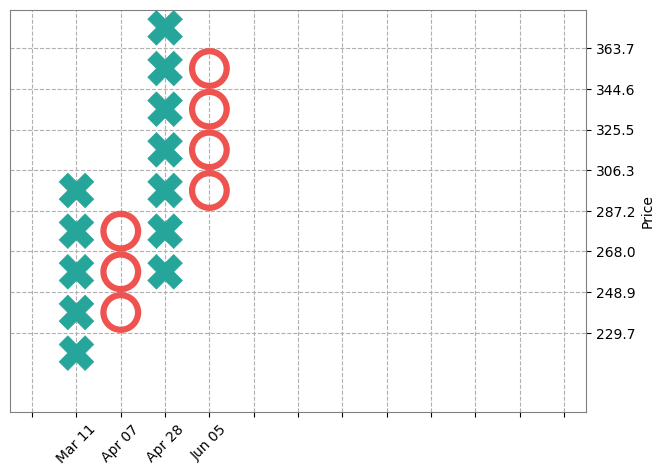

In [52]:
mpf.plot(df,type='pnf', style = "tradingview")

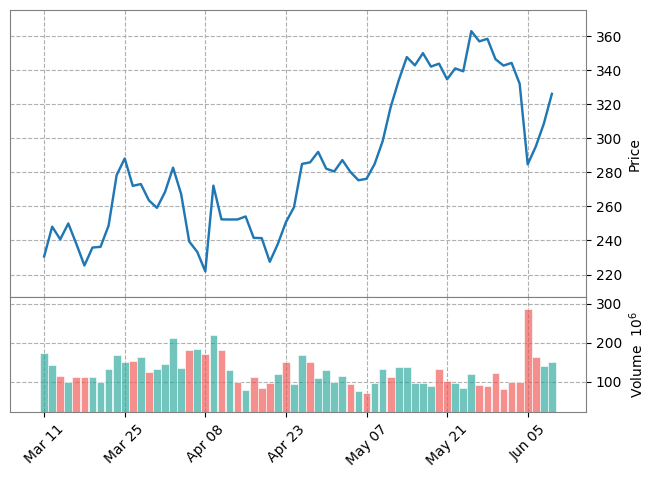

In [54]:
mpf.plot(df,type='line', volume = True, style = "tradingview")